<a href="https://colab.research.google.com/github/YeimeLeandro/Hyperblog/blob/main/Analisis_Cuantitativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving escala_likert.xlsx to escala_likert (9).xlsx
Coeficientes de Correlación (Pearson):
              Pregunta 1  Pregunta 2    Pregunta 3  Pregunta 4    Pregunta 5  \
Pregunta 1     1.000000   -0.121268  1.290994e-01    0.111803  3.535534e-01   
Pregunta 2    -0.121268    1.000000 -6.262243e-01    0.542326  5.144958e-01   
Pregunta 3     0.129099   -0.626224  1.000000e+00    0.288675 -1.520235e-16   
Pregunta 4     0.111803    0.542326  2.886751e-01    1.000000  7.905694e-01   
Pregunta 5     0.353553    0.514496 -1.520235e-16    0.790569  1.000000e+00   
Pregunta 6    -0.087039   -0.802181  8.989331e-01   -0.097312 -4.308202e-01   
Pregunta 7    -0.577350    0.840168 -7.453560e-01    0.161374  1.020621e-01   
Pregunta 8     0.242536   -0.617647  1.565561e-01   -0.406745  8.574929e-02   
Pregunta 9    -0.790569    0.000000  4.082483e-01    0.353553 -1.241267e-16   
Pregunta 10    0.848668   -0.205832  4.980119e-01    0.431291  6.000992e-01   
Pregunta 11    0.353553   -0.342997  9.

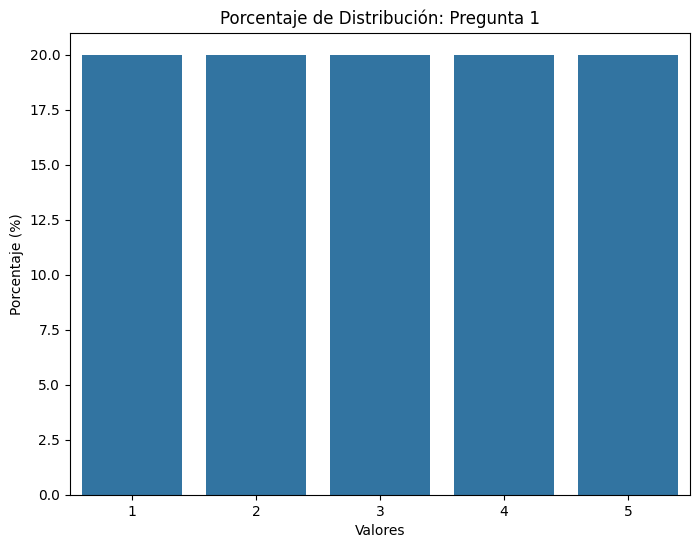

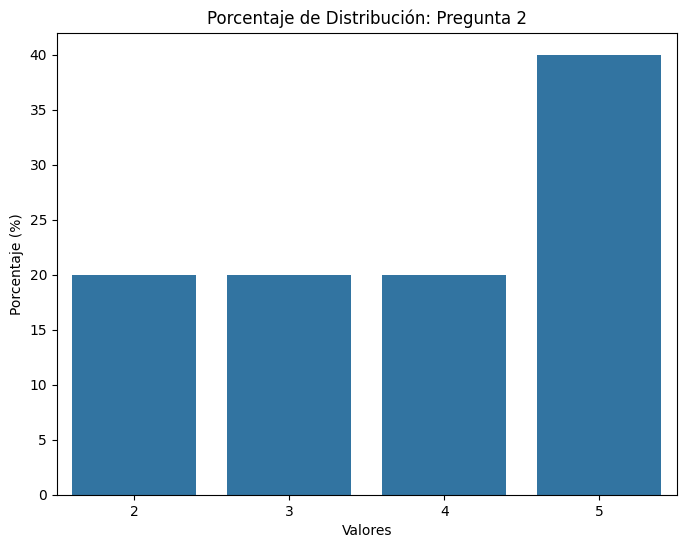

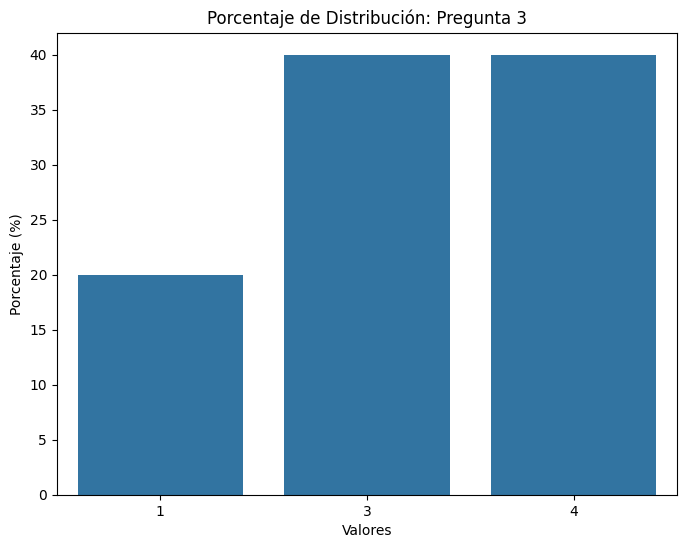

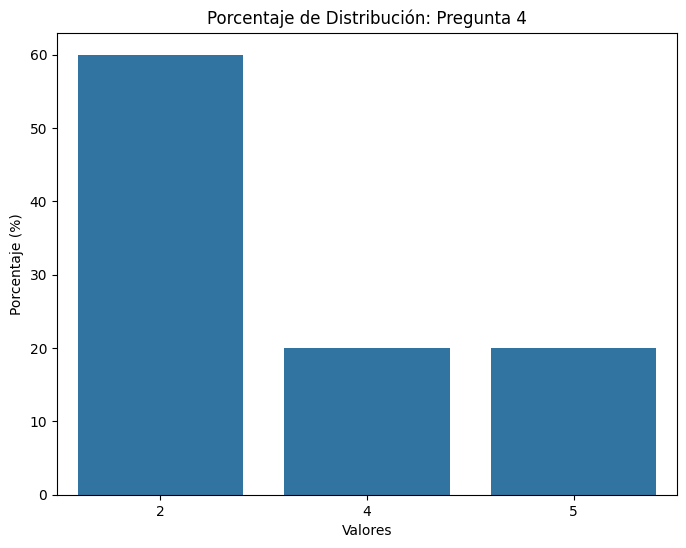

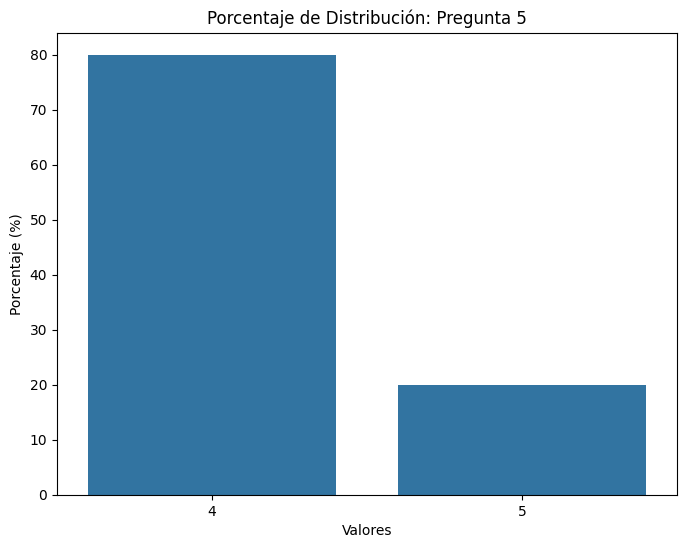

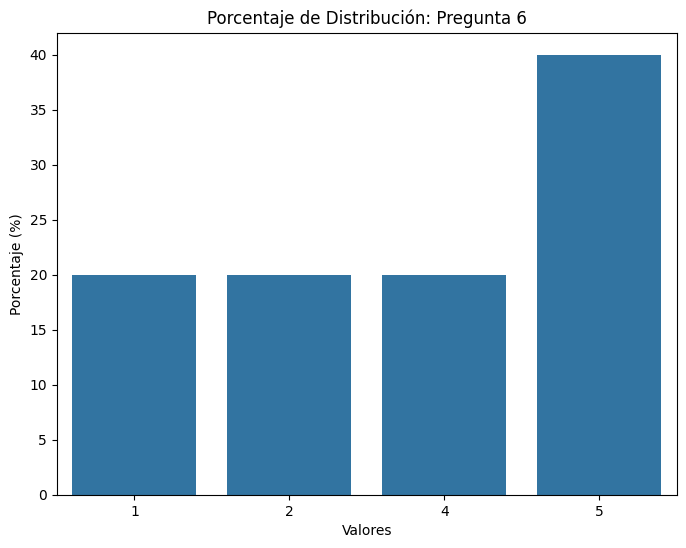

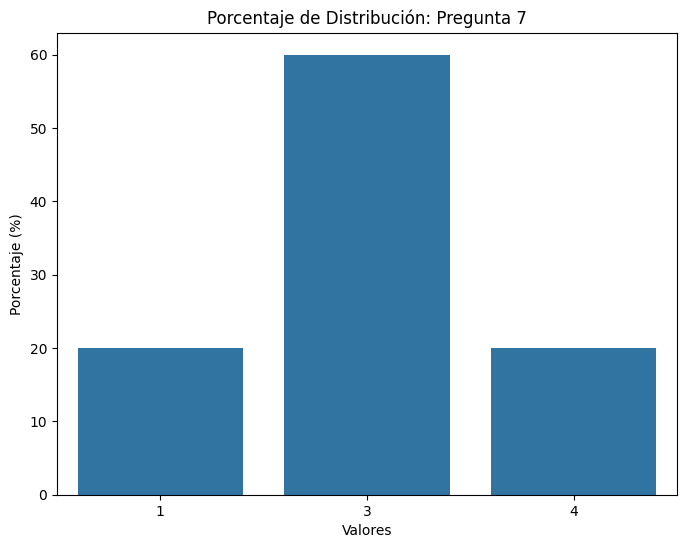

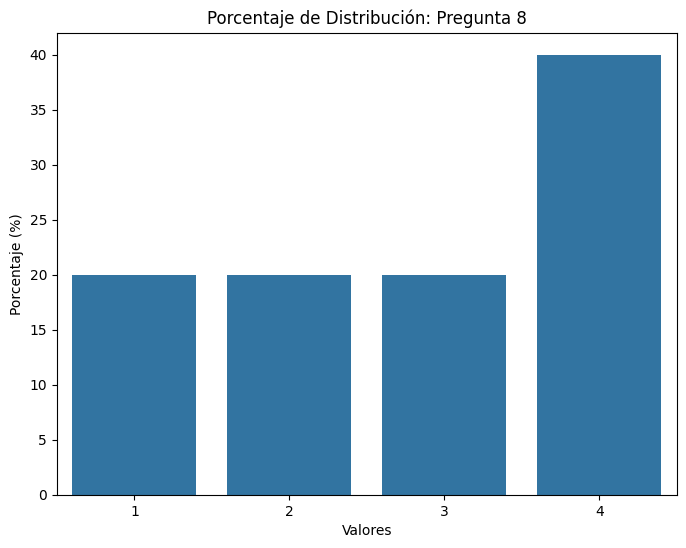

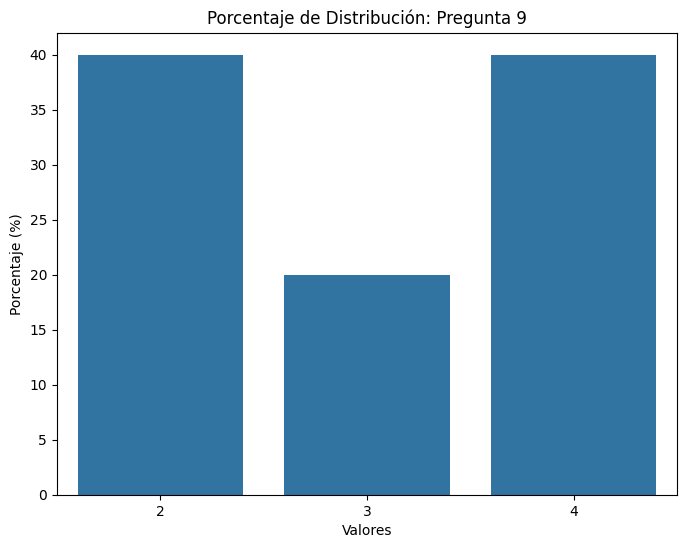

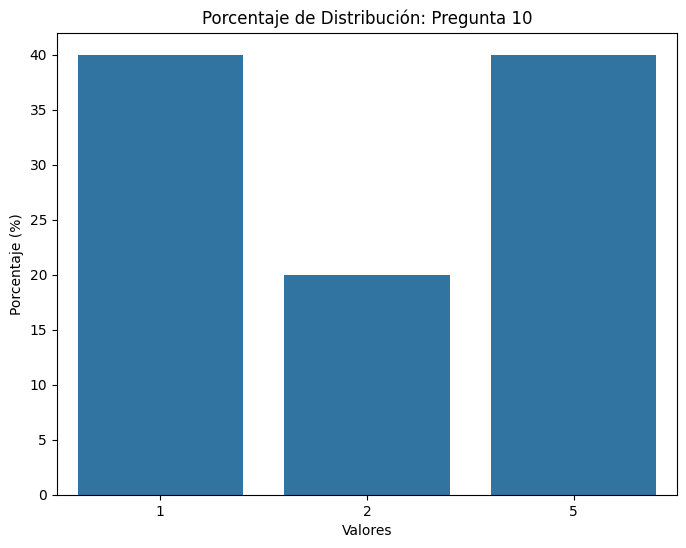

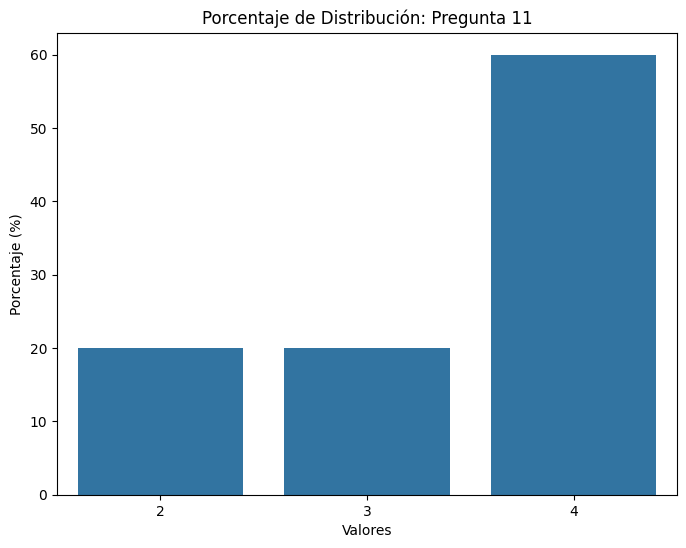

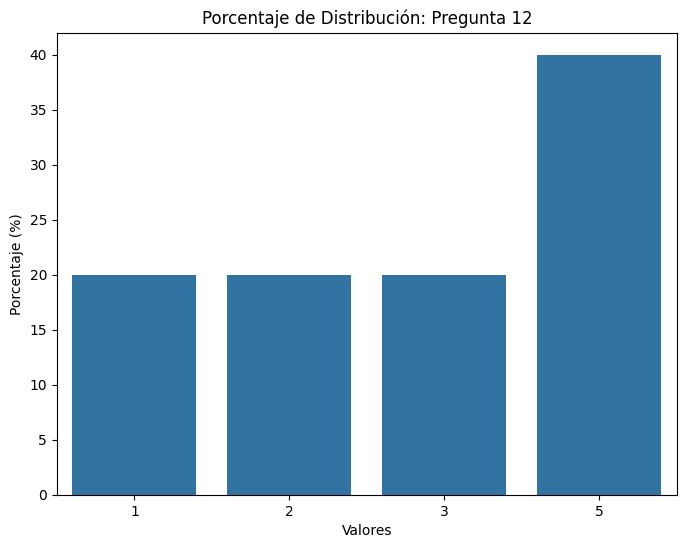

In [10]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Cargar el archivo de datos de Excel en Google Colab
uploaded = files.upload()

# Asegúrate de haber cargado el archivo Excel antes de continuar
file_path = next(iter(uploaded))  # Obtener el nombre del archivo cargado
data = pd.read_excel(file_path)

# 1. Coeficientes de Correlación (Pearson, Spearman, Kendall)
def calcular_correlacion(data):
    correlacion_pearson = data.corr(method='pearson')
    correlacion_spearman = data.corr(method='spearman')
    correlacion_kendall = data.corr(method='kendall')
    return correlacion_pearson, correlacion_spearman, correlacion_kendall

# 2. Regresión Lineal
def regresion_lineal(X, Y):
    model = LinearRegression()
    model.fit(X, Y)
    return model.coef_, model.intercept_

# 3. Distribución de Frecuencias y en porcentaje
def distribucion_frecuencias(data):
    distribucion = data.apply(lambda x: x.value_counts())
    distribucion_porcentaje = data.apply(lambda x: x.value_counts(normalize=True) * 100)
    return distribucion, distribucion_porcentaje

# 4. Prueba t de Student
def prueba_t(X, Y):
    return stats.ttest_ind(X, Y, nan_policy='omit')

# 5. Prueba de la diferencia de proporciones
def prueba_diferencia_proporciones(p1, n1, p2, n2):
    P = (p1 * n1 + p2 * n2) / (n1 + n2)
    Z = (p1 - p2) / np.sqrt(P * (1 - P) * (1/n1 + 1/n2))
    p_value = stats.norm.sf(abs(Z)) * 2  # Prueba de dos colas
    return Z, p_value

# 6. Análisis de varianza (ANOVA)
def anova(data):
    return stats.f_oneway(*[data[col] for col in data.columns])

# 7. Prueba Chi Cuadrado
def prueba_chi2(tabla_contingencia):
    result = stats.chi2_contingency(tabla_contingencia)
    return result[0], result[1]  # Retorna chi2-stat y p-value

# 8. Gráficos de porcentaje de distribución (Gráfico de barras)
def graficar_porcentaje_distribucion(data):
    for column in data.columns:
        plt.figure(figsize=(8, 6))
        # Calcular la frecuencia de cada valor en porcentaje
        distribucion_porcentaje = data[column].value_counts(normalize=True) * 100
        sns.barplot(x=distribucion_porcentaje.index, y=distribucion_porcentaje.values)
        plt.title(f'Porcentaje de Distribución: {column}')
        plt.xlabel('Valores')
        plt.ylabel('Porcentaje (%)')
        plt.show()

# Realizar cálculos
correlacion_pearson, correlacion_spearman, correlacion_kendall = calcular_correlacion(data)

# Ejemplo: Usar Pregunta 1 como X y Pregunta 2 como Y para la regresión lineal
X = data['Pregunta 1'].values.reshape(-1, 1)
Y = data['Pregunta 2'].values

coeficientes, intercepto = regresion_lineal(X, Y)
frecuencias, frecuencias_porcentaje = distribucion_frecuencias(data)
anova_resultado = anova(data)

# Mostrar resultados
print("Coeficientes de Correlación (Pearson):\n", correlacion_pearson)
print("\nCoeficientes de Correlación (Spearman):\n", correlacion_spearman)
print("\nCoeficientes de Correlación (Kendall):\n", correlacion_kendall)
print("\nCoeficientes de Regresión Lineal:", coeficientes)
print("Intercepto de la Regresión Lineal:", intercepto)
print("\nDistribución de Frecuencias:\n", frecuencias)
print("\nDistribución de Frecuencias en Porcentaje:\n", frecuencias_porcentaje)
print("\nResultado ANOVA:\n", anova_resultado)

# Prueba t de Student entre Pregunta 1 y Pregunta 2
t_stat, p_value_t = stats.ttest_ind(data['Pregunta 1'], data['Pregunta 2'], nan_policy='omit')
print(f"Prueba t: t-stat = {t_stat}, p-value = {p_value_t}")

# Proporciones para la prueba de diferencia de proporciones
p1 = data['Pregunta 1'].mean() / 5  # Proporción de respuestas positivas
p2 = data['Pregunta 2'].mean() / 5
n1 = len(data['Pregunta 1'].dropna())
n2 = len(data['Pregunta 2'].dropna())

z_stat, p_value_proporciones = prueba_diferencia_proporciones(p1, n1, p2, n2)
print(f"Prueba de Diferencia de Proporciones: Z-stat = {z_stat}, p-value = {p_value_proporciones}")

# Crear tabla de contingencia y prueba Chi Cuadrado entre Pregunta 1 y Pregunta 2
tabla_contingencia = pd.crosstab(data['Pregunta 1'], data['Pregunta 2'])
chi2_stat, p_value_chi = prueba_chi2(tabla_contingencia)
print(f"Prueba Chi Cuadrado: chi2-stat = {chi2_stat}, p-value = {p_value_chi}")

# Crear gráficos de porcentaje de distribución
graficar_porcentaje_distribucion(data)
